In [1]:
import pandas as pd
import statsmodels.api as sm

# 读取数据
data = pd.read_excel("增加控制PANSStotal.xlsx")

# 定义需要回归控制的字段和控制变量
dependent_variables = [
    "Stroop_incongruent_rt", 
    "Stroop_interference effect_rt", 
    "Nogo_acc", 
    "Switch_cost", 
    "RM-1,750_acc", 
    "RM-750_acc",
    "DSBT_Span"
]
control_variable = "PANSS-T"

# 存储残差的 DataFrame
residuals_df = pd.DataFrame()

# 对每个字段进行回归，计算残差并保持原字段名
for var in dependent_variables:
    # 构建回归模型
    X = data[control_variable]
    X = sm.add_constant(X)  # 添加截距项
    y = data[var]
    
    # 回归模型拟合
    model = sm.OLS(y, X).fit()
    
    # 获取残差
    residuals = model.resid
    residuals_df[var] = residuals  # 使用原字段名存储残差

# 将残差保存为新的 Excel 文件
residuals_df.to_excel("结果EF增加回归掉PANSStotal.xlsx", index=False)

print("残差已计算并保存为文件 EF增加回归掉PANSStotal.xlsx")

残差已计算并保存为文件 EF增加回归掉PANSStotal.xlsx


In [2]:
for var in dependent_variables:
    X = data[control_variable]
    X = sm.add_constant(X)
    y = data[var]
    model = sm.OLS(y, X).fit()
    print(f"Regression results for {var}:\n", model.summary())

Regression results for Stroop_incongruent_rt:
                               OLS Regression Results                             
Dep. Variable:     Stroop_incongruent_rt   R-squared:                       0.022
Model:                               OLS   Adj. R-squared:                  0.016
Method:                    Least Squares   F-statistic:                     3.555
Date:                   Mon, 24 Feb 2025   Prob (F-statistic):             0.0612
Time:                           12:17:57   Log-Likelihood:                -203.23
No. Observations:                    160   AIC:                             410.5
Df Residuals:                        158   BIC:                             416.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

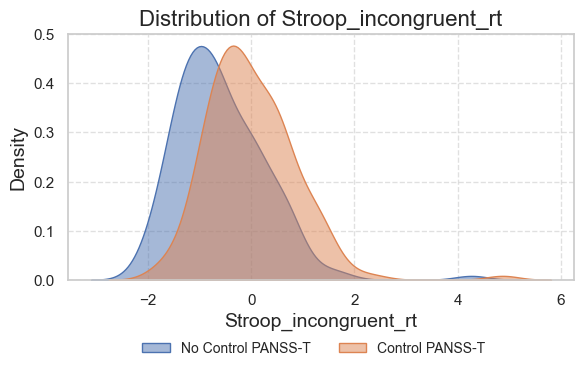

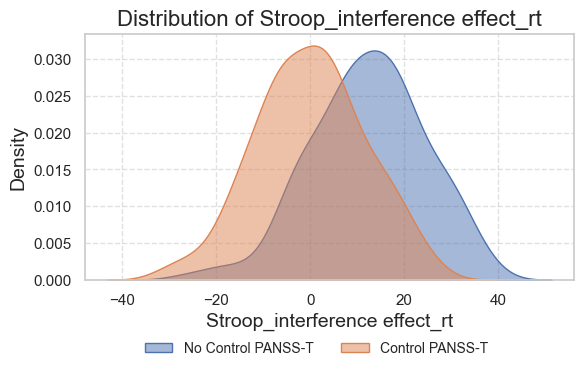

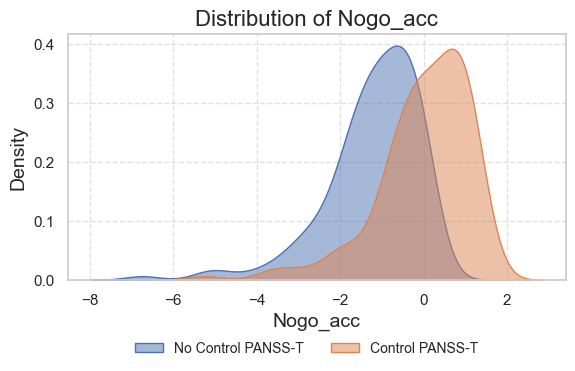

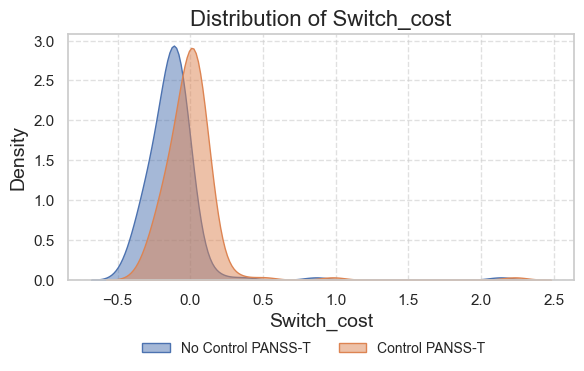

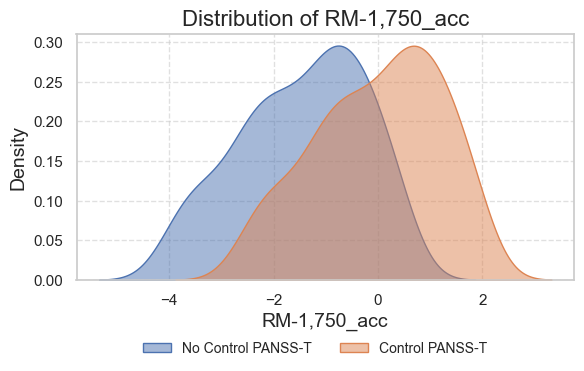

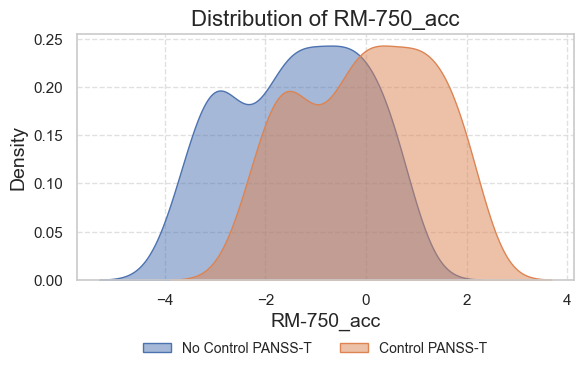

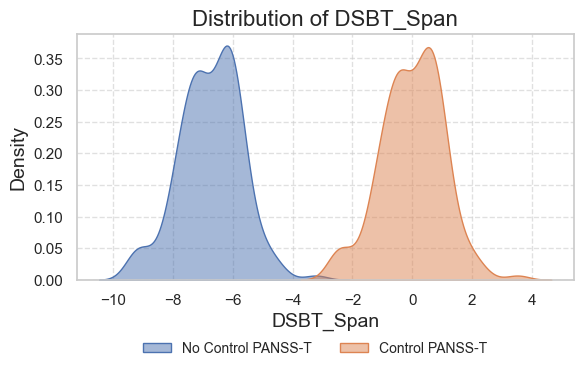

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 文件路径
file_no_control = "table/校正并标准化后的患者行为变量数据.xlsx"
file_control = "结果EF增加回归掉PANSStotal.xlsx"

# 需要可视化的字段
fields = [
    "Stroop_incongruent_rt",
    "Stroop_interference effect_rt",
    "Nogo_acc",
    "Switch_cost",
    "RM-1,750_acc",
    "RM-750_acc",
    "DSBT_Span",
]

# 读取数据
data_no_control = pd.read_excel(file_no_control)
data_control = pd.read_excel(file_control)

# 设置图形风格
sns.set(style="whitegrid")

# 遍历字段并绘图
for field in fields:
    plt.figure(figsize=(6, 4))
    
    # 绘制核密度图
    sns.kdeplot(data_no_control[field], label="No Control PANSS-T", fill=True, alpha=0.5)
    sns.kdeplot(data_control[field], label="Control PANSS-T", fill=True, alpha=0.5)
    
    # 添加图表标题和标签
    plt.title(f"Distribution of {field}", fontsize=16)
    plt.xlabel(field, fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.legend(fontsize=10, loc="upper right", bbox_to_anchor=(0.85, -0.2),ncol=2, frameon=False)
    plt.grid(True, linestyle="--", alpha=0.6)
    
    # 显示图表
    plt.tight_layout()

    #save
    plt.savefig(f"图/{field}.jpg", dpi=1200, bbox_inches="tight")
    plt.show()